In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import set_config

In [13]:
# Can we use house size to predict house price
sacramento = pd.read_csv("/Users/Ezynne/Documents/DSI/LCR/01_materials/notebooks/dataset/sacramento.csv")
sacramento
#/Users/Ezynne/Documents/DSI/LCR/01_materials/notebooks/dataset/wdbc.csv

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


In [ ]:
# house sale prize = b0 (price at house size =0) + b1(house size)
# b1 = price hange per sq ft = slope

In [14]:
set_config(transform_output= 'pandas')
sacramento = pd.read_csv("/Users/Ezynne/Documents/DSI/LCR/01_materials/notebooks/dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


In [15]:
#dataset split
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75, random_state=25
)

In [26]:
#perform linear regression
# step 1: define x and y
X_train = sacramento_train[['sq__ft']]
y_train = sacramento_train['price']


In [27]:
# step 2 = initailize model
lm = LinearRegression()

In [28]:
lm.fit (X_train, y_train)

LinearRegression()

In [29]:
pd.DataFrame({
    'slope': [lm.coef_[0]],
    'intercept':[lm.intercept_]
})

,slope,intercept
0,136.98014,13656.998716


In [33]:
sacramento_test['predicted'] = lm.predict(sacramento_test[['sq__ft']])

RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

RMSPE


79539.35466280741

In [34]:
# Calculate R² 
r2 = r2_score( 
y_true=sacramento_test["price"], y_pred=sacramento_test["predicted"] 
)

r2

0.4623657694306246

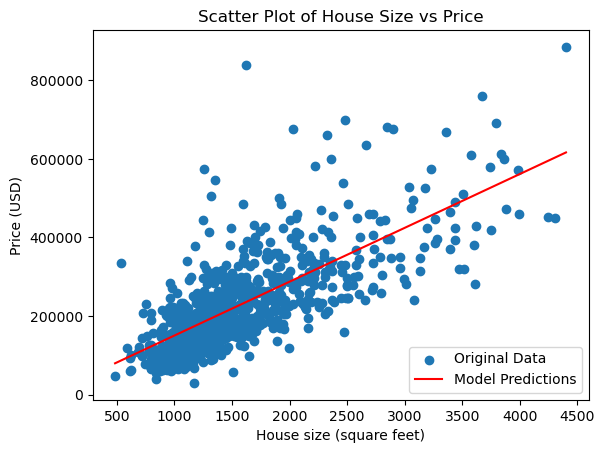

In [35]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [36]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,    # setting up the cross validation number
    X= sacramento[["sq__ft"]],
    y= sacramento["price"],
    scoring="neg_root_mean_squared_error" #or scoring="r2"
)

In [ ]:
cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df
#negative test scoe is rmspe

,fit_time,score_time,test_score
0,0.004997,0.001999,-81369.919847
1,0.004001,0.004994,-97590.236340
2,0.005985,0.005996,-61790.733828
3,0.002999,0.003996,-92026.283010
4,0.004998,0.002998,-75474.947490


In [39]:
#actual rmspe

cv_5_df['test_score'] = cv_5_df['test_score'].abs()
cv_5_df

,fit_time,score_time,test_score
0,0.004997,0.001999,81369.919847
1,0.004001,0.004994,97590.236340
2,0.005985,0.005996,61790.733828
3,0.002999,0.003996,92026.283010
4,0.004998,0.002998,75474.947490


In [ ]:
cv_5_df_metrics = cv_5_df.agg(['mean','sem'])
cv_5_df_metrics
#sem = standard error of mean or standard deviation

,fit_time,score_time,test_score
mean,0.004596,0.003997,81650.424103
sem,0.000508,0.000706,6302.216095


In [43]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,    # setting up the cross validation number
    X= sacramento[["sq__ft"]],
    y= sacramento["price"],
    scoring="r2" #or scoring="r2"
)

In [44]:
cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df

,fit_time,score_time,test_score
0,0.004999,0.005995,0.435588
1,0.005995,0.003999,0.535374
2,0.005996,0.004998,0.552512
3,0.004995,0.006998,0.490983
4,0.004994,0.003996,0.524179


In [45]:
cv_5_df_metrics = cv_5_df.agg(['mean','sem'])
cv_5_df_metrics

,fit_time,score_time,test_score
mean,0.005396,0.005197,0.507727
sem,0.000245,0.000583,0.020646


In [46]:
#multiple predictors

mlm = LinearRegression()

mlm.fit(
    sacramento_train[['sq__ft','beds']],
    sacramento_train ['price']
)

LinearRegression()

In [47]:
mlm.coef_

array([   156.13937007, -20869.93317436])

In [48]:
mlm.coef_[0]

156.13937006817542

In [49]:
mlm.coef_[1]

-20869.9331743589

In [50]:
mlm.intercept_

50834.08783348961

In [51]:
#make our prdiction
sacramento_test['predicted'] = mlm.predict(sacramento_test[['sq__ft','beds']])

In [52]:
#calculate RMPSE

mlm_rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test ['predicted']
)**0.5
mlm_rmspe

77917.0867983096

In [53]:
#calculate RMPSE

mlm_r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test ['predicted']
)**0.5
mlm_r2

0.6957535973167013

In [ ]:
#just to have a more robust cross validate with more than one random split
returned_dictionary_mlm = cross_validate(
    estimator=mlm, 
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft", "beds"]],
    y=sacramento["price"],
    scoring="neg_root_mean_squared_error" 
)

In [57]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)    # Converting it to pandas DataFrame
cv_5_df_mlm["test_score"] = cv_5_df_mlm["test_score"].abs()

cv_5_df_mlm

,fit_time,score_time,test_score
0,0.004998,0.001999,79862.104410
1,0.005997,0.001996,95393.067119
2,0.002999,0.001999,61298.854877
3,0.004996,0.003995,92691.983589
4,0.002999,0.002999,73940.758792


In [58]:
#aggregate to obtain the mean and standard error across all 5 folds
cv_5_metrics_mlm = cv_5_df_mlm.agg(["mean","sem"])
cv_5_metrics_mlm

,fit_time,score_time,test_score
mean,0.004398,0.002598,80637.353757
sem,0.000600,0.000399,6254.870549


In [59]:
returned_dictionary_mlm = cross_validate(
    estimator=mlm, 
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft", "beds"]],
    y=sacramento["price"],
    scoring="r2" 
)

In [60]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)    # Converting it to pandas DataFrame
cv_5_df_mlm["test_score"] = cv_5_df_mlm["test_score"].abs()

cv_5_df_mlm

,fit_time,score_time,test_score
0,0.005997,0.004005,0.456312
1,0.004993,0.004997,0.556060
2,0.004993,0.002998,0.559608
3,0.003997,0.003998,0.483592
4,0.003999,0.002999,0.543327


In [61]:
cv_5_metrics_mlm = cv_5_df_mlm.agg(["mean","sem"])
cv_5_metrics_mlm

,fit_time,score_time,test_score
mean,0.004796,0.003799,0.51978
sem,0.000374,0.000374,0.02097


In [62]:
#looking at categorical variable

sacramento['type'].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [65]:
#convert category into numbers

sacramento_encoded = pd.get_dummies(sacramento, columns =['type'], drop_first=True)
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,False,True
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,False,True
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,False,True
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,False,True
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,False,True
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,False,True
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,False,True
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,False,True


#false = 0, true =1

In [66]:
mlm = LinearRegression()


In [70]:
mlm.fit (sacramento_encoded[['sq__ft','type_Multi-Family','type_Residential']], sacramento_encoded['price'])

LinearRegression()

In [71]:
beta_coef = mlm.coef_
beta_coef

array([   134.69626636, -53699.75640571,  15492.85991368])

In [ ]:
#choose our refrence category
sacramento_encoded = sacramento_encoded.drop(columns = ['type_Multi-Family'])